# Apziva Project-4

Importing the libraries

In [1]:
import numpy as np
import tensorflow as tf

C:\Users\nahas\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
print(tf.__version__)   # checking the version of TensorFlow

2.16.1


##### Loading the data

In [3]:
training_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'images/training', labels='inferred', label_mode="int", class_names=None, color_mode="rgb", batch_size=32, image_size=(256, 256),
    shuffle=True, seed=None, validation_split=None, subset=None, interpolation="bilinear", follow_links=False,
    crop_to_aspect_ratio=False, pad_to_aspect_ratio=False, data_format=None, verbose=True,
    )

Found 2392 files belonging to 2 classes.


In [4]:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'images/testing', labels='inferred', label_mode="int", class_names=None, color_mode="rgb", batch_size=32, image_size=(256, 256),
    shuffle=True, seed=None, validation_split=None, subset=None, interpolation="bilinear", follow_links=False,
    crop_to_aspect_ratio=False, pad_to_aspect_ratio=False, data_format=None, verbose=True,
    )

Found 597 files belonging to 2 classes.


In [5]:
training_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [6]:
test_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

Check the class names from the class_names attribute of the datasets

In [7]:
class_names = training_dataset.class_names
print(class_names)

['flip', 'notflip']


In [8]:
class_names_test = test_dataset.class_names
print(class_names_test)

['flip', 'notflip']


##### Visualize the data

In [9]:
import matplotlib.pyplot as plt

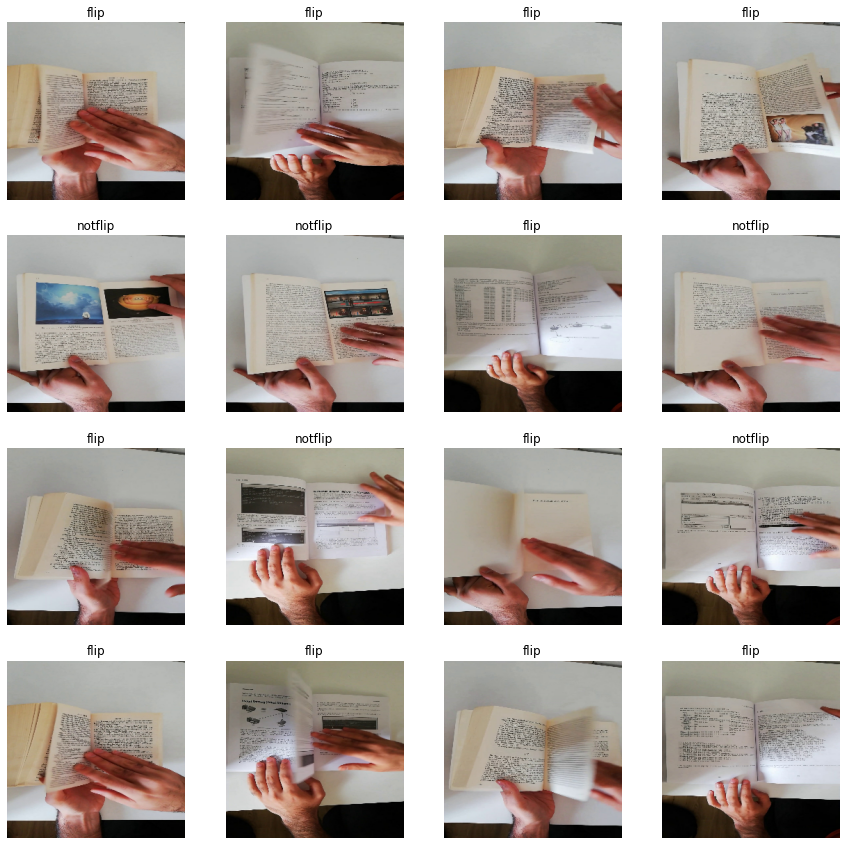

In [10]:
plt.figure(figsize=(15, 15))
#for images, labels in training_dataset.take(1):
for images, labels in training_dataset:
  for i in range(16):                                # printing 16 images
    ax = plt.subplot(4, 4, i + 1)                    # specifying the number of images in rows and columns
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [11]:
for image_batch, labels_batch in training_dataset:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


This is a batch of 32 images of shape 256x256x3 (the last dimension refers to color channels RGB). 
The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

In [12]:
print(labels_batch[0])     # printing the first label

tf.Tensor(0, shape=(), dtype=int32)


In [13]:
print(image_batch[0])     # printing the first image

tf.Tensor(
[[[139.45703  136.0664   122.23828 ]
  [141.20703  138.20703  119.20703 ]
  [141.01172  138.01172  121.01172 ]
  ...
  [150.       143.       124.      ]
  [151.       142.75     124.25    ]
  [151.       142.75     124.25    ]]

 [[140.60938  134.60938  119.390625]
  [141.       139.       118.      ]
  [141.95312  138.95312  119.953125]
  ...
  [151.       144.       125.      ]
  [150.6211   141.6211   124.62109 ]
  [150.       141.       124.      ]]

 [[140.3711   136.54297  114.93359 ]
  [140.00781  138.20703  114.26953 ]
  [138.       141.       113.90625 ]
  ...
  [148.98828  143.98828  123.98828 ]
  [148.       143.       124.      ]
  [147.75     142.75     123.75    ]]

 ...

 [[  2.5        0.5        1.5     ]
  [  2.5        1.5        0.25    ]
  [  3.         2.         0.      ]
  ...
  [  2.         2.         2.      ]
  [  2.         2.         0.      ]
  [  2.         2.         0.      ]]

 [[  4.         2.         5.      ]
  [  4.         2.        

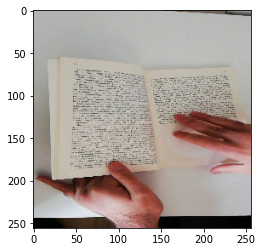

In [14]:
image_batch_training, labels_batch_training = next(iter(training_dataset))
plt.imshow(image_batch_training[0].numpy().astype("uint8"))

##### Cropping

In [15]:
from tensorflow.keras import layers

In [16]:
cropping_layer = tf.keras.layers.Cropping2D(cropping=((20, 20), (10, 10)))

In [17]:
training_dataset_cropped = training_dataset.map(lambda x, y: (cropping_layer(x), y))

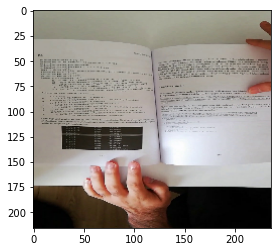

In [18]:
image_batch_cropped, labels_batch_cropped = next(iter(training_dataset_cropped))
plt.imshow(image_batch_cropped[0].numpy().astype("uint8"))

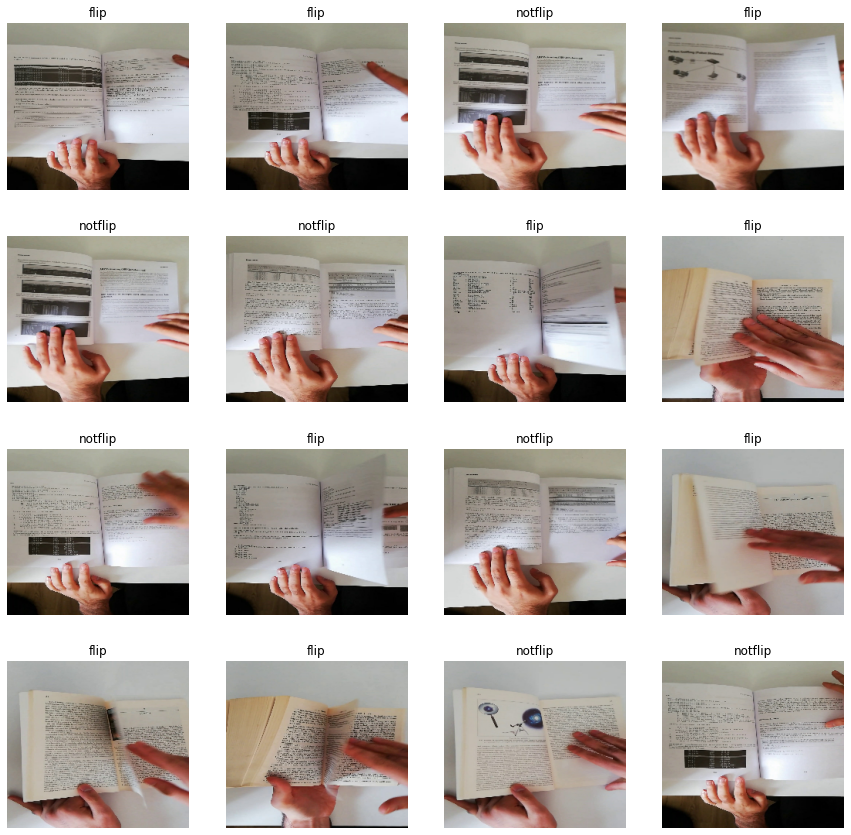

In [19]:
#import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
#for images, labels in training_dataset_cropped.take(1):
for images, labels in training_dataset_cropped:
  for i in range(16):                                # printing 16 images
    ax = plt.subplot(4, 4, i + 1)                    # specifying the number of images in rows and columns
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [20]:
for image_batch, labels_batch in training_dataset_cropped:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 216, 236, 3)
(32,)


##### Standardization / Normalization  ---> Not implemented because rescaling is done within the model

##### Create the model

In [21]:
#from tensorflow import keras
from tensorflow.keras.models import Sequential

In [22]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling((1./255), input_shape=(180, 180, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  #layers.Dense(128, activation='relu'),
  #layers.Dense(num_classes)
])

C:\Users\nahas\anaconda3\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


###### Compile the model

In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

View all the layers of the network using the Keras 'Model.summary' method

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,584 (92.12 KB)

 Trainable params: 23,584 (92.12 KB)

 Non-trainable params: 0 (0.00 B)

##### Train the model

In [25]:
training_dataset_cropped.element_spec

(TensorSpec(shape=(None, 216, 236, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None,), dtype=tf.int32, name=None))

In [26]:
epochs=5
history = model.fit(
  training_dataset_cropped,
  validation_data=test_dataset,
  epochs=epochs, 
  verbose = 1
)

Epoch 1/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 24s 304ms/step - accuracy: 0.0110 - loss: 9.0725 - val_accuracy: 0.4724 - val_loss: 3.6097
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 25s 322ms/step - accuracy: 0.4544 - loss: 2.3593 - val_accuracy: 0.4858 - val_loss: 0.7578
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 23s 307ms/step - accuracy: 0.5048 - loss: 0.7422 - val_accuracy: 0.4858 - val_loss: 0.7063
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 23s 305ms/step - accuracy: 0.4854 - loss: 0.7190 - val_accuracy: 0.5159 - val_loss: 0.6990
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 23s 304ms/step - accuracy: 0.5349 - loss: 0.7092 - val_accuracy: 0.4858 - val_loss: 0.7376


##### Visualize training results

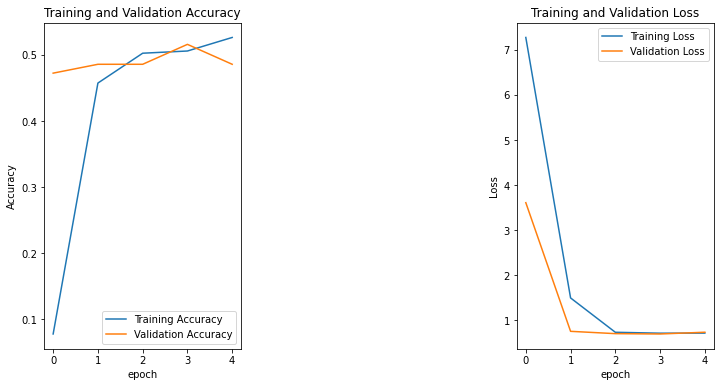

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
#plt.xticks([0, 1, 2])
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 3, 3)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
#plt.xticks([0, 1, 2])
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

##### Making prediction on the Test Dataset

First, we'll resize and rescale the 'Test Dataset'

In [28]:
for image_batch, labels_batch in test_dataset:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


In [29]:
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(180, 180),
  layers.Rescaling(1./255)
])

In [30]:
#test_dataset_preprocessed = test_dataset.map(lambda x, y: (resize_and_rescale(x, training=True), y))
test_dataset_preprocessed = test_dataset.map(lambda x, y: (resize_and_rescale(x), y))

In [31]:
image_batch_test, labels_batch_test = next(iter(test_dataset_preprocessed))
# Notice the pixel values are now in `[0,1]`.
print(np.min(image_batch_test[0]), np.max(image_batch_test[0]))

0.0 0.91642106


In [32]:
for image_batch, labels_batch in test_dataset_preprocessed:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


Now making predction

In [33]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [34]:
predictions = probability_model.predict(test_dataset_preprocessed)

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step


In [35]:
predictions.shape

(597, 30976)

In [36]:
print(predictions[0])

[9.2765520e-04 9.4110740e-04 2.7443122e-05 ... 2.7443122e-05 2.7443122e-05
 2.7443122e-05]


In [37]:
print(predictions[596])

[9.2956895e-04 9.4255368e-04 2.7438444e-05 ... 2.7438444e-05 2.7438444e-05
 2.7438444e-05]


Using argmax function to convert predictions into 1-D array because both 'prediction' and 'labels' must be 1-D arrays of the same shape for the confusion matrix function.

In [38]:
predictions_1D = np.argmax(predictions, axis=1)

In [39]:
predictions_1D.shape

(597,)

Now getting the labels/class values for the test dataset

In [40]:
labels_batch_test.shape

TensorShape([32])

Since our data is batched, so we need to use list comprehension to put all values of 'y' in a list.

In [41]:
test_dataset_labels = np.concatenate([y for x, y in test_dataset], axis=0)

[y for x, y in test_dataset] is known as “list comprehension” in python. If dataset is batched, this expression will loop thru each batch and put each batch y (a TF 1D tensor) in the list, and return it. Then, np.concatenate will take this list of 1-D tensor (implicitly casting to numpy) and stack it in the 0-axis to produce a single long vector. In summary, it is just converting a bunch of 1-d little vector into one long vector.

In [42]:
test_dataset_labels.shape

(597,)

##### Confusion Matrix

In [43]:
tf.math.confusion_matrix(
    test_dataset_labels,
    predictions_1D,
    num_classes=2,
    #weights=None,
    #dtype=tf.dtypes.int32,
    #name=None
)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[  0, 290],
       [  0, 307]])>

In [44]:
----- breakpoint -----

SyntaxError: invalid syntax (2768986962.py, line 1)

##### Saving and loading the model

In [ ]:
model.save('tfmodel')

In [ ]:
#del model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model = load_model('tfmodel')

----- End -----